In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('youtube_recommendation_dataset -.csv')

# SEÇÃO: DOCUMENTAÇÃO DA FONTE DE DADOS


FONTE DE DADOS:
- Nome: YouTube Recommendation Dataset
- URL: [Inserir URL do Kaggle/GitHub onde obteve]
- Licença: [Especificar - ex: CC BY 4.0, MIT, etc]
- Data de Acesso: Dezembro 2025
- Descrição: Dataset contendo métricas de vídeos recomendados pelo YouTube

VARIÁVEIS PRINCIPAIS:
- views: Número de visualizações (alvo para regressão)
- likes: Número de likes
- comment_count: Quantidade de comentários
- category: Categoria do vídeo
- [Adicionar outras variáveis conforme seu dataset]

HIPÓTESES DE NEGÓCIO:
H1: Vídeos com mais comentários tendem a receber mais visualizações
H2: A categoria do vídeo influencia significativamente nas recomendações
H3: Existe correlação forte entre likes e visualizações
H4: Modelos polinomiais capturam melhor a relação não-linear entre features

OBJETIVO:
Prever visualizações (regressão) e/ou categoria recomendada (classificação)
usando algoritmos de IA, otimizando hiperparâmetros e comparando desempenho.

In [16]:
print(__doc__)

Automatically created module for IPython interactive environment


## Imports e configurações iniciais

In [3]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

## Carregar e inspecionar o dataset

In [4]:
# Informações iniciais
print('Shape:', df.shape)
print('\nColunas:')
print(df.columns.tolist())


# Mostrar primeiras linhas
display(df.head())


# Estatísticas descritivas
display(df.describe(include='all').T)


# Tipos e contagem de nulos
display(df.info())
print('\nNulos por coluna:\n', df.isnull().sum())

Shape: (537, 16)

Colunas:
['Title', 'channel_title', 'published_at', 'category_id', 'view_count', 'like_count', 'comment_count', 'favorite_count', 'duration', 'definition', 'caption', 'engagement_rate', 'likes_to_views_ratio', 'comments_to_views_ratio', 'duration_seconds', 'video_age_days']


,Title,channel_title,published_at,category_id,view_count,like_count,comment_count,favorite_count,duration,definition,caption,engagement_rate,likes_to_views_ratio,comments_to_views_ratio,duration_seconds,video_age_days
0,LA PERVERSA X LA INSUPERABLE X ALOFOKE MUSIC X...,AlofokeMusicSounds,2025-11-16 15:34:55+00:00,10,1405647,140463,9063,0,PT1M51S,hd,False,0.106375,0.099928,0.006448,111,1
1,Moana | Official Teaser,Disney,2025-11-17 17:00:47+00:00,24,2776847,26801,6684,0,PT1M,hd,True,0.012059,0.009652,0.002407,60,0
2,$0 - $1 Trillion Only FISHING in Steal a Brain...,CaylusBlox,2025-11-17 22:57:14+00:00,20,1189857,16174,1827,0,PT18M2S,hd,False,0.015129,0.013593,0.001535,1082,0
3,ALLDAY PROJECT - ‘ONE MORE TIME’ M/V,THEBLACKLABEL,2025-11-17 09:00:07+00:00,10,5319161,0,12869,0,PT3M23S,hd,True,0.002419,0.000000,0.002419,203,1
4,La Lupa | Vendetta Hero Trailer | Overwatch 2,PlayOverwatch,2025-11-17 17:00:06+00:00,20,597542,41742,4728,0,PT3M35S,hd,True,0.077768,0.069856,0.007912,215,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,537,533,Must Play Mobile Game-Epic War!😎 #shorts #game...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_title,537,344,freeCodeCamp.org,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_at,537,537,2025-08-24 16:00:39+00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_id,537.0,NaN,NaN,NaN,22.456238,5.854776,1.0,20.0,24.0,27.0,28.0
view_count,537.0,NaN,NaN,NaN,21457518.182495,40151999.735213,0.0,2676921.0,6385911.0,22706041.0,369731024.0
like_count,537.0,NaN,NaN,NaN,433604.389199,838671.051648,0.0,55591.0,155055.0,463189.0,10879340.0
comment_count,537.0,NaN,NaN,NaN,7125.700186,36075.115032,0.0,1018.0,2354.0,5925.0,810641.0
favorite_count,537.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
duration,537,366,PT1M,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
definition,537,2,hd,535,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    537 non-null    object 
 1   channel_title            537 non-null    object 
 2   published_at             537 non-null    object 
 3   category_id              537 non-null    int64  
 4   view_count               537 non-null    int64  
 5   like_count               537 non-null    int64  
 6   comment_count            537 non-null    int64  
 7   favorite_count           537 non-null    int64  
 8   duration                 537 non-null    object 
 9   definition               537 non-null    object 
 10  caption                  537 non-null    bool   
 11  engagement_rate          537 non-null    float64
 12  likes_to_views_ratio     537 non-null    float64
 13  comments_to_views_ratio  537 non-null    float64
 14  duration_seconds         5

None


Nulos por coluna:
 Title                      0
channel_title              0
published_at               0
category_id                0
view_count                 0
like_count                 0
comment_count              0
favorite_count             0
duration                   0
definition                 0
caption                    0
engagement_rate            0
likes_to_views_ratio       0
comments_to_views_ratio    0
duration_seconds           0
video_age_days             0
dtype: int64


## Escolha da variável-alvo e hipóteses de negócio

In [5]:
# Estratégia automática para escolha da variável alvo (exemplo):
# - Se existir coluna 'views' (numérica) consideramos regressão (prever views).
# - Se existir coluna 'category' ou 'label' com poucas classes, consideramos classificação.


candidates_reg = [c for c in df.columns if c.lower() in ['views','view_count','likes','dislikes','comment_count','watch_time']]
candidates_clf = [c for c in df.columns if c.lower() in ['category','label','class','genre','is_recommended','target']]


TARGET = None
TASK = None


if candidates_reg:
    TARGET = candidates_reg[0]
    TASK = 'regression'
elif candidates_clf:
    TARGET = candidates_clf[0]
    TASK = 'classification'

# fallback: escolher a primeira coluna numérica com var>0
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols)>0:
    TARGET = numeric_cols[0]
    TASK = 'regression'
else:
    TARGET = df.columns[0]
    TASK = 'classification'


print('TASK:', TASK)
print('TARGET:', TARGET)

TASK: regression
TARGET: category_id


## Detecção e tratamento de outliers (boxplot + IQR)

In [6]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()


from scipy import stats


outlier_summary = {}
for c in num_cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    outliers = df[(df[c] < lower) | (df[c] > upper)][c]
    outlier_summary[c] = len(outliers)


# Mostrar colunas com outliers
{k: v for k,v in outlier_summary.items() if v>0}


# Estratégia: opcional winsorization para colunas muito assimétricas (não feito automaticamente aqui)

{'category_id': 10,
 'view_count': 62,
 'like_count': 52,
 'comment_count': 61,
 'engagement_rate': 21,
 'likes_to_views_ratio': 21,
 'comments_to_views_ratio': 64,
 'duration_seconds': 80,
 'video_age_days': 17}

## Visualizações (histogramas, boxplots, pairplot, heatmap)

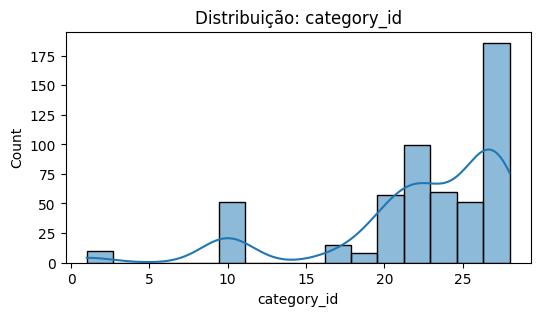

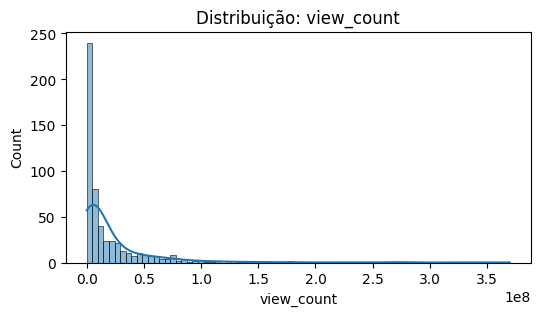

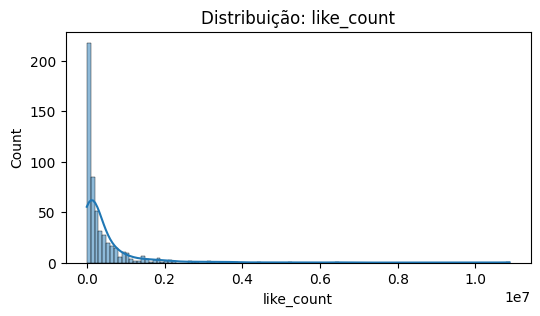

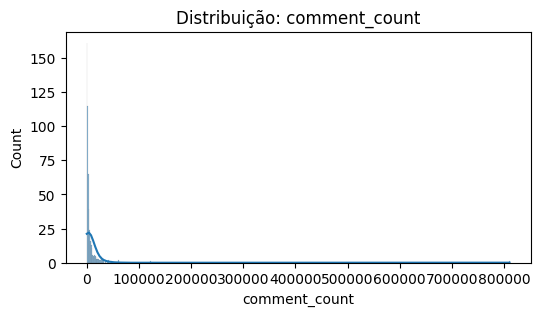

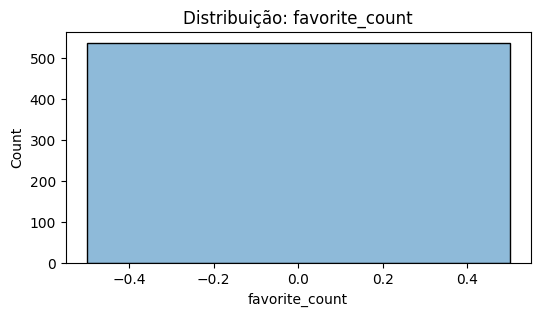

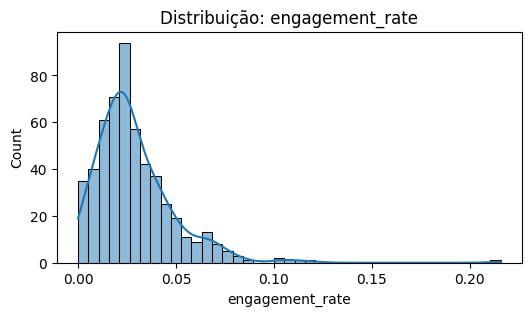

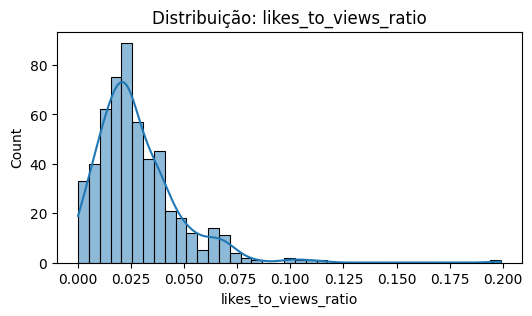

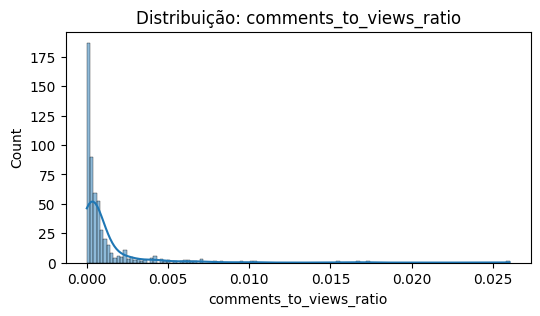

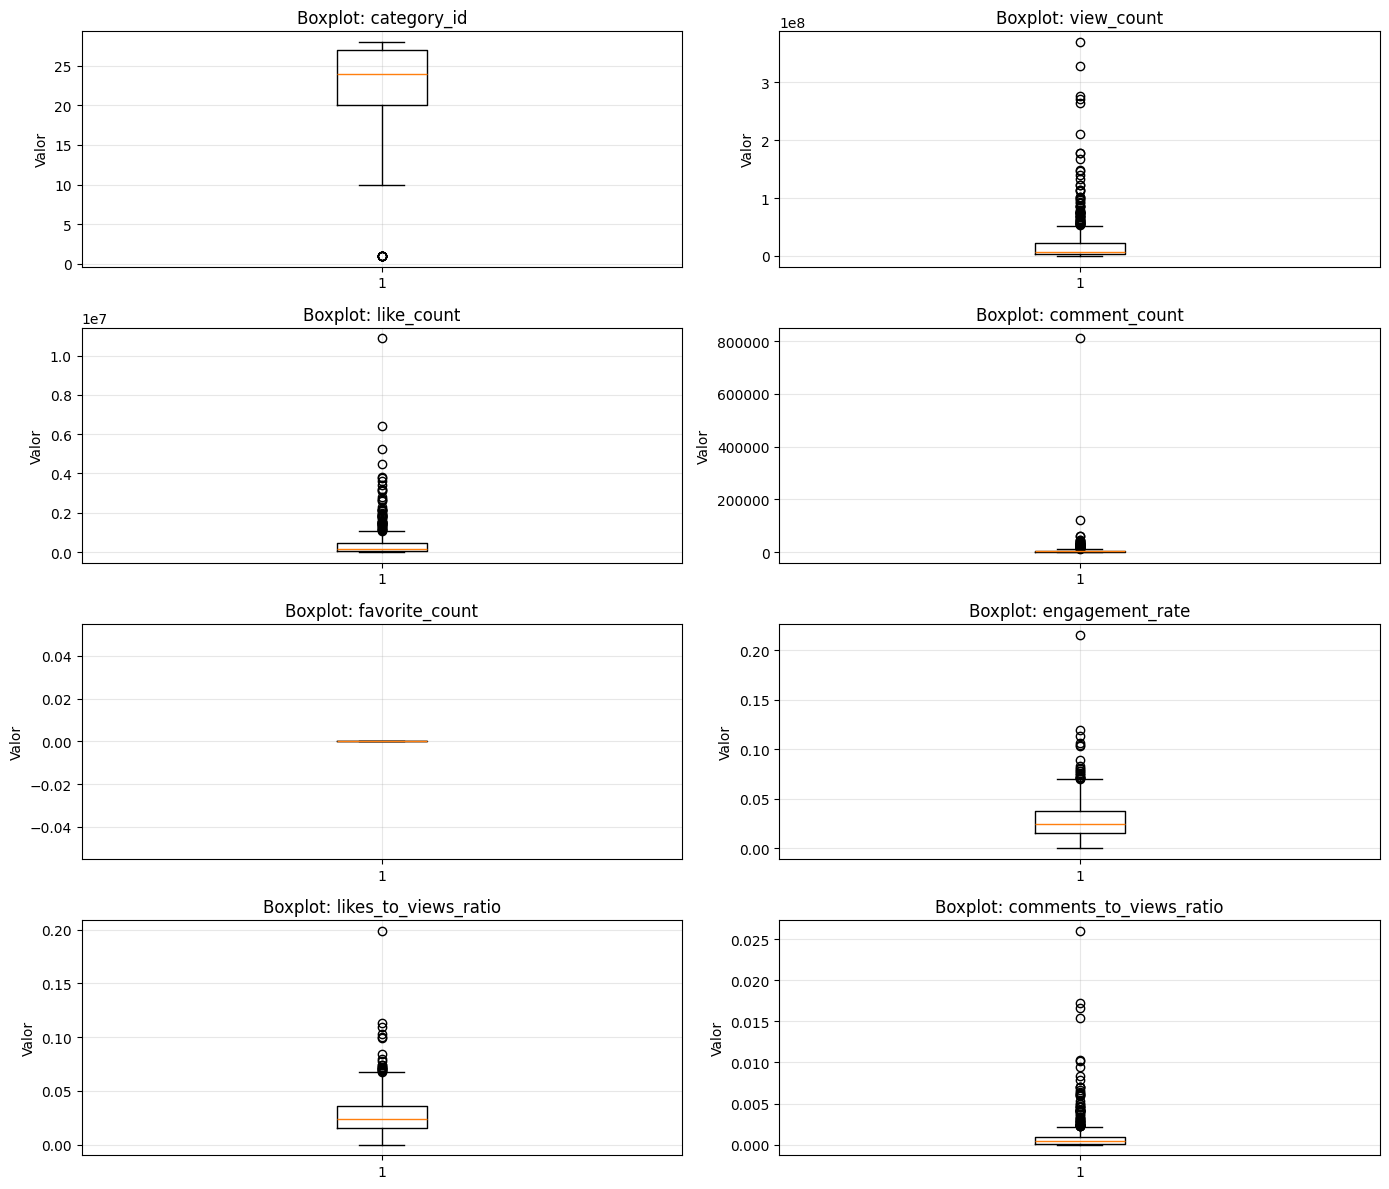

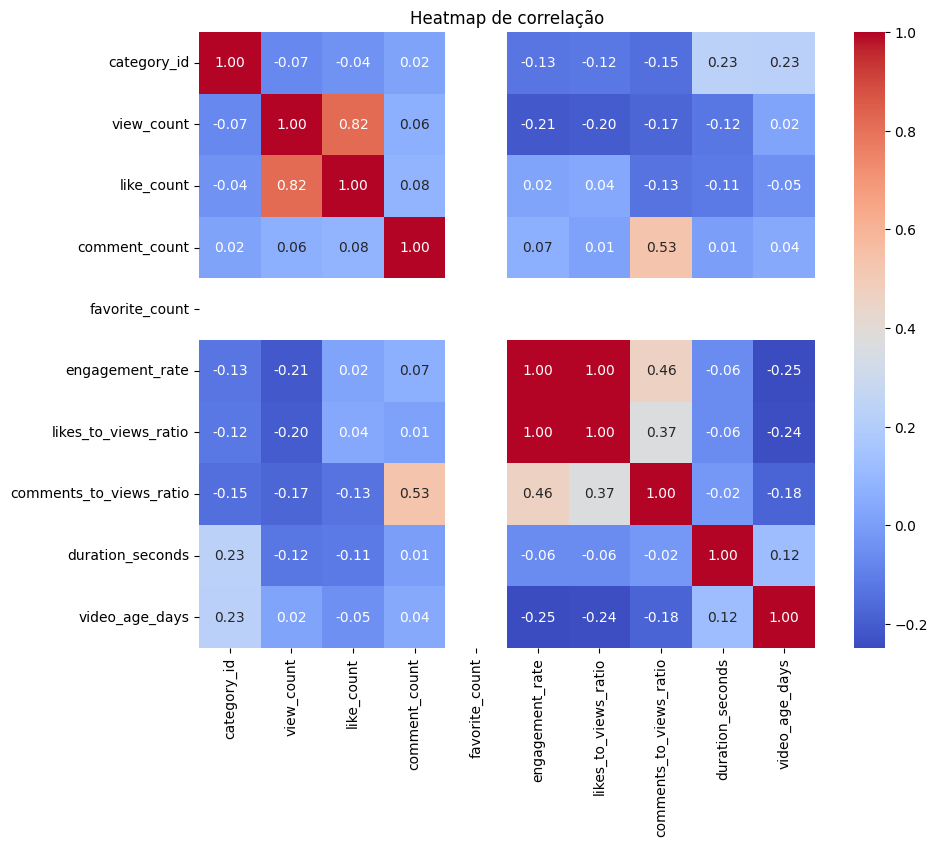

In [7]:
# Histogramas básicos
for c in num_cols[:8]:
    plt.figure(figsize=(6,3))
    sns.histplot(df[c], kde=True)
    plt.title(f'Distribuição: {c}')
    plt.show()

## Boxplots e Distribuição de Outliers

# Boxplots para detectar outliers visualmente
fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, col in enumerate(num_cols[:8]):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Boxplot: {col}')
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Heatmap de correlação (numéricas)
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap de correlação')
plt.show()

In [22]:

# TESTES ESTATÍSTICOS - CORRELAÇÃO E HIPÓTESES

from scipy.stats import pearsonr, spearmanr, f_oneway, chi2_contingency, ttest_ind
import warnings
warnings.filterwarnings('ignore')

print('='*80)
print('TESTES ESTATÍSTICOS - VALIDAÇÃO DE HIPÓTESES')
print('='*80)

# 1. TESTE DE CORRELAÇÃO (Pearson e Spearman)
print('\n1. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS NUMÉRICAS')
print('-'*80)

numeric_cols_filtered = [c for c in num_cols if c != TARGET]

correlations = []
for col in numeric_cols_filtered:
    if len(df[col].dropna()) > 2:
        pearson_r, pearson_p = pearsonr(df[TARGET].dropna(), df[col].dropna())
        spearman_r, spearman_p = spearmanr(df[TARGET].dropna(), df[col].dropna())
        
        correlations.append({
            'Variável': col,
            'Pearson_r': pearson_r,
            'Pearson_p': pearson_p,
            'Spearman_r': spearman_r,
            'Spearman_p': spearman_p,
            'Significante': 'Sim' if pearson_p < 0.05 else 'Não'
        })

corr_df = pd.DataFrame(correlations).sort_values('Pearson_r', key=abs, ascending=False)
print(corr_df.to_string(index=False))

print('\n📌 Interpretação:')
print('   - Pearson_p < 0.05: Correlação é estatisticamente significante')
print('   - Pearson_r próximo de ±1: Correlação forte')
print('   - Pearson_r próximo de 0: Correlação fraca')

# 2. TESTE T (comparar grupos)
print('\n\n2. TESTE T (T-test) - COMPARAÇÃO ENTRE GRUPOS')
print('-'*80)

# Exemplo: se existir variável categórica binária
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if len(categorical_cols) > 0 and TASK == 'regression':
    print(f'Testando diferença de médias de {TARGET} entre grupos...\n')
    
    for cat_col in categorical_cols[:2]:  # Primeiras 2 categóricas
        unique_vals = df[cat_col].unique()
        
        if len(unique_vals) == 2:  # Binária
            group1 = df[df[cat_col] == unique_vals[0]][TARGET].dropna()
            group2 = df[df[cat_col] == unique_vals[1]][TARGET].dropna()
            
            if len(group1) > 1 and len(group2) > 1:
                t_stat, t_pvalue = ttest_ind(group1, group2)
                print(f'Variável: {cat_col}')
                print(f'  Grupo {unique_vals[0]}: Média = {group1.mean():.2f}, N = {len(group1)}')
                print(f'  Grupo {unique_vals[1]}: Média = {group2.mean():.2f}, N = {len(group2)}')
                print(f'  T-statistic: {t_stat:.4f}, p-value: {t_pvalue:.6f}')
                print(f'  Resultado: {"Diferença SIGNIFICANTE" if t_pvalue < 0.05 else "Sem diferença significante"}\n')

# 3. ANOVA (comparar 3+ grupos)
print('\n3. ANOVA - COMPARAÇÃO ENTRE MÚLTIPLOS GRUPOS')
print('-'*80)

if len(categorical_cols) > 0 and TASK == 'regression':
    for cat_col in categorical_cols[:1]:
        unique_vals = df[cat_col].unique()
        
        if len(unique_vals) > 2 and len(unique_vals) <= 10:
            groups = [df[df[cat_col] == val][TARGET].dropna().values for val in unique_vals]
            groups = [g for g in groups if len(g) > 1]
            
            if len(groups) >= 2:
                f_stat, f_pvalue = f_oneway(*groups)
                print(f'Variável: {cat_col}')
                print(f'  Número de grupos: {len(groups)}')
                print(f'  F-statistic: {f_stat:.4f}, p-value: {f_pvalue:.6f}')
                print(f'  Resultado: {"Diferença SIGNIFICANTE entre grupos" if f_pvalue < 0.05 else "Sem diferença significante entre grupos"}\n')

# 4. CHI-QUADRADO (associação entre categóricas)
print('\n4. TESTE CHI-QUADRADO - ASSOCIAÇÃO ENTRE VARIÁVEIS CATEGÓRICAS')
print('-'*80)

if len(categorical_cols) >= 2:
    cat_col1 = categorical_cols[0]
    cat_col2 = categorical_cols[1] if len(categorical_cols) > 1 else categorical_cols[0]
    
    if cat_col1 != cat_col2:
        contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])
        chi2, chi_pvalue, dof, expected = chi2_contingency(contingency_table)
        
        print(f'Variáveis testadas: {cat_col1} x {cat_col2}')
        print(f'  Chi-square: {chi2:.4f}, p-value: {chi_pvalue:.6f}, DOF: {dof}')
        print(f'  Resultado: {"Associação SIGNIFICANTE" if chi_pvalue < 0.05 else "Sem associação significante"}\n')

print('='*80)

TESTES ESTATÍSTICOS - VALIDAÇÃO DE HIPÓTESES

1. ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS NUMÉRICAS
--------------------------------------------------------------------------------
               Variável  Pearson_r    Pearson_p  Spearman_r   Spearman_p Significante
       duration_seconds   0.234204 3.992914e-08    0.295576 2.743367e-12          Sim
         video_age_days   0.227565 9.753906e-08    0.352044 4.110328e-17          Sim
comments_to_views_ratio  -0.148169 5.719237e-04    0.105225 1.470799e-02          Sim
        engagement_rate  -0.130413 2.461860e-03    0.025386 5.572107e-01          Sim
   likes_to_views_ratio  -0.120089 5.328675e-03    0.029740 4.916346e-01          Sim
             view_count  -0.069897 1.056748e-01   -0.096472 2.537869e-02          Não
             like_count  -0.036015 4.048896e-01   -0.055358 2.002543e-01          Não
          comment_count   0.018088 6.757946e-01    0.019917 6.451531e-01          Não
         favorite_count        NaN          NaN 

## Modelagem — Regressão

In [8]:
if TASK != 'regression':
    print('Pular seção de regressão: tarefa é', TASK)
else:
    # Escolher features: remover colunas identificadoras e a própria TARGET
    features = [c for c in df.columns if c != TARGET]
    X = df[features].select_dtypes(include=[np.number]).copy()
    y = df[TARGET]


    # Preencher/transformar categóricas (ex.: One-Hot) - aqui usamos apenas numéricas por simplicidade
    # Alinhar shapes
    X = X.fillna(0)


    # Split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_SEED)


    print('Train/Val/Test sizes:', X_train.shape, X_val.shape, X_test.shape)

Train/Val/Test sizes: (375, 9) (81, 9) (81, 9)


## Baseline (mean predictor) e regressão linear simples/múltipla

In [9]:
if TASK == 'regression':
    # Baseline MAE/RMSE usando média
    y_pred_baseline = np.repeat(y_train.mean(), len(y_val))
    print('Baseline MAE:', mean_absolute_error(y_val, y_pred_baseline))
    print('Baseline RMSE:', root_mean_squared_error(y_val, y_pred_baseline))


    # Múltipla - sklearn LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_val)
    print('\nLinear Regression on validation:')
    print('MAE', mean_absolute_error(y_val, y_pred_lr))
    print('RMSE', root_mean_squared_error(y_val, y_pred_lr))
    print('R2', r2_score(y_val, y_pred_lr))


    # statsmodels para interpretação (adicionar constante)
    X_train_sm = sm.add_constant(X_train)
    ols_model = sm.OLS(y_train, X_train_sm).fit()
    print(ols_model.summary())

Baseline MAE: 5.25445267489712
Baseline RMSE: 7.020397550090513

Linear Regression on validation:
MAE 4.746899765347168
RMSE 6.671691931527164
R2 0.09207421637770863
                            OLS Regression Results                            
Dep. Variable:            category_id   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     5.733
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           2.61e-06
Time:                        11:44:56   Log-Likelihood:                -1135.9
No. Observations:                 375   AIC:                             2288.
Df Residuals:                     367   BIC:                             2319.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std er

## Regressão polinomial

In [10]:
if TASK == 'regression':
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_p = poly.fit_transform(X_train)
    X_val_p = poly.transform(X_val)


    lr_poly = LinearRegression()
    lr_poly.fit(X_train_p, y_train)
    y_pred_poly = lr_poly.predict(X_val_p)
    print('Poly deg2 RMSE:', root_mean_squared_error(y_val, y_pred_poly))
    print('Poly deg2 R2:', r2_score(y_val, y_pred_poly))

Poly deg2 RMSE: 29.147594454499867
Poly deg2 R2: -16.329411620356737


## Validação Cruzada(K-Fold)

In [ ]:
## Validação Cruzada (K-Fold)

if TASK == 'regression':
    print('='*60)
    print('VALIDAÇÃO CRUZADA - REGRESSÃO')
    print('='*60)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
    
    # Linear Regression
    lr_cv = LinearRegression()
    cv_scores_lr = cross_val_score(lr_cv, X, y, cv=kfold, scoring='r2')
    print(f'\nLinear Regression (5-Fold CV):')
    print(f'  R² médio: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})')
    print(f'  Scores: {cv_scores_lr}')
    


VALIDAÇÃO CRUZADA - REGRESSÃO

Linear Regression (5-Fold CV):
  R² médio: 0.0445 (+/- 0.0443)
  Scores: [ 0.02791611  0.12447228 -0.00166474  0.01497563  0.05671154]

Polynomial Regression (5-Fold CV):
  R² médio: -4.5452 (+/- 9.1468)
  Scores: [-2.28385903e+01  7.93969860e-02  6.08521051e-02 -2.86648570e-02
  9.14925861e-04]


## Grid Search para Otimização

OTIMIZAÇÃO DE HIPERPARÂMETROS - REGRESSÃO

1. GRID SEARCH
Fitting 5 folds for each of 4 candidates, totalling 20 fits

✅ Melhor parâmetro (Grid): {'lr__fit_intercept': True, 'lr__positive': True}
✅ Melhor R² (CV): 0.0663
✅ Tempo: Grid Search testa 4 combinações

Detalhes Grid Search:
 param_lr__fit_intercept  param_lr__positive  mean_test_score  std_test_score
                    True                True         0.066333        0.058547
                    True               False         0.028919        0.048037
                   False                True       -20.099992        5.328428
                   False               False       -20.072966        5.305320

2. RANDOM SEARCH
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Melhor parâmetro (Random): {'lr__fit_intercept': False, 'poly__degree': 1, 'poly__include_bias': True}
✅ Melhor R² (CV): 0.0289
✅ Tempo: Random Search testa 20 combinações aleatórias

Detalhes Random Search (Top 5):
 param_poly__degree  param

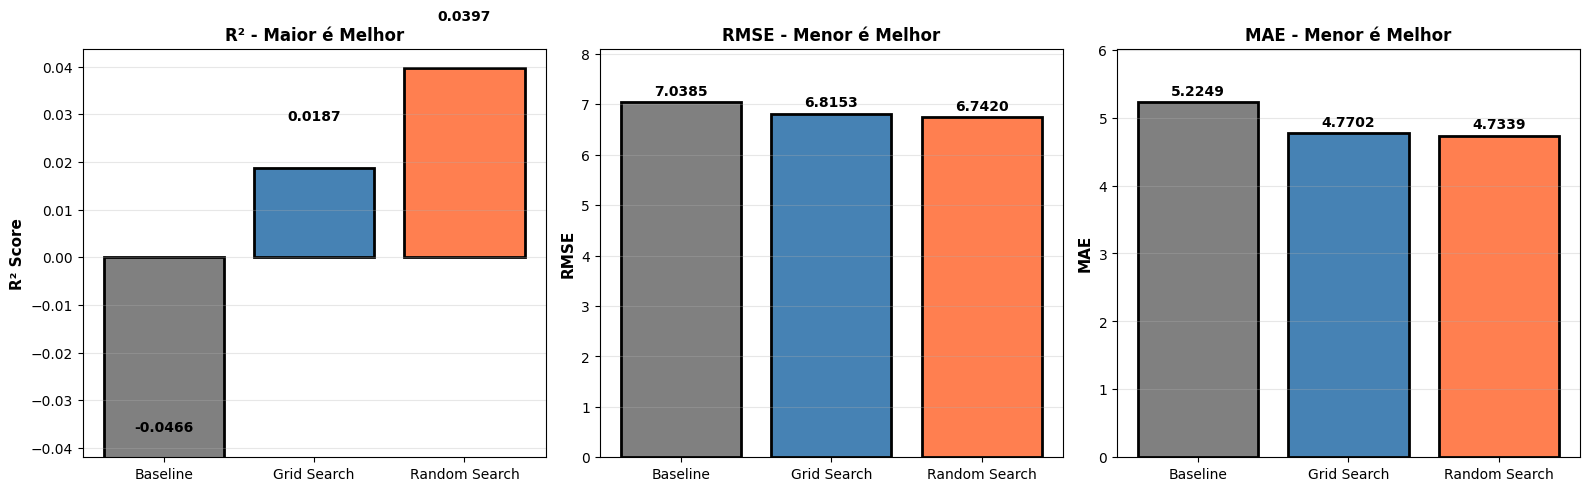


RESUMO COMPARATIVO - OTIMIZAÇÃO
       Modelo R² (Teste) RMSE (Teste) MAE (Teste) Ganho R² vs Baseline Melhoria %
     Baseline    -0.0466       7.0385      5.2249               0.0000      0.00%
  Grid Search     0.0187       6.8153      4.7702               0.0653    140.11%
Random Search     0.0397       6.7420      4.7339               0.0863    185.13%



In [25]:
# ==========================================
# OTIMIZAÇÃO COM GRID SEARCH E RANDOM SEARCH
# ==========================================

if TASK == 'regression':
    print('='*80)
    print('OTIMIZAÇÃO DE HIPERPARÂMETROS - REGRESSÃO')
    print('='*80)
    
    # ===== GRID SEARCH =====
    print('\n' + '='*60)
    print('1. GRID SEARCH')
    print('='*60)
    
    pipeline_grid = Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ])
    
    param_grid = {
        'lr__fit_intercept': [True, False],
        'lr__positive': [True, False]
    }
    
    grid_search = GridSearchCV(
        pipeline_grid, 
        param_grid, 
        cv=5, 
        scoring='r2', 
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    
    print(f'\n✅ Melhor parâmetro (Grid): {grid_search.best_params_}')
    print(f'✅ Melhor R² (CV): {grid_search.best_score_:.4f}')
    print(f'✅ Tempo: Grid Search testa {len(grid_search.cv_results_["params"])} combinações')
    
    # Resultados detalhados
    grid_results = pd.DataFrame(grid_search.cv_results_)
    print('\nDetalhes Grid Search:')
    print(grid_results[['param_lr__fit_intercept', 'param_lr__positive', 'mean_test_score', 'std_test_score']].to_string(index=False))
    
    # ===== RANDOM SEARCH =====
    print('\n' + '='*60)
    print('2. RANDOM SEARCH')
    print('='*60)
    
    from scipy.stats import uniform, randint
    
    pipeline_random = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures()),
        ('lr', LinearRegression())
    ])
    
    param_dist = {
        'poly__degree': randint(1, 4),
        'poly__include_bias': [True, False],
        'lr__fit_intercept': [True, False]
    }
    
    random_search = RandomizedSearchCV(
        pipeline_random,
        param_dist,
        n_iter=20,  # Testa 20 combinações aleatórias
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=RANDOM_SEED,
        verbose=1
    )
    random_search.fit(X_train, y_train)
    
    print(f'\n✅ Melhor parâmetro (Random): {random_search.best_params_}')
    print(f'✅ Melhor R² (CV): {random_search.best_score_:.4f}')
    print(f'✅ Tempo: Random Search testa 20 combinações aleatórias')
    
    # Resultados detalhados
    random_results = pd.DataFrame(random_search.cv_results_)
    print('\nDetalhes Random Search (Top 5):')
    top_random = random_results.nlargest(5, 'mean_test_score')[['param_poly__degree', 'param_poly__include_bias', 'param_lr__fit_intercept', 'mean_test_score', 'std_test_score']]
    print(top_random.to_string(index=False))
    
    # ===== AVALIAÇÃO NO TESTE =====
    print('\n' + '='*60)
    print('AVALIAÇÃO NO CONJUNTO DE TESTE')
    print('='*60)
    
    # Grid Search
    y_pred_grid = grid_search.predict(X_test)
    r2_grid = r2_score(y_test, y_pred_grid)
    rmse_grid = root_mean_squared_error(y_test, y_pred_grid)
    mae_grid = mean_absolute_error(y_test, y_pred_grid)
    
    print(f'\n🔷 GRID SEARCH (Teste):')
    print(f'   R²: {r2_grid:.4f}')
    print(f'   RMSE: {rmse_grid:.4f}')
    print(f'   MAE: {mae_grid:.4f}')
    
    # Random Search
    y_pred_random = random_search.predict(X_test)
    r2_random = r2_score(y_test, y_pred_random)
    rmse_random = root_mean_squared_error(y_test, y_pred_random)
    mae_random = mean_absolute_error(y_test, y_pred_random)
    
    print(f'\n🔶 RANDOM SEARCH (Teste):')
    print(f'   R²: {r2_random:.4f}')
    print(f'   RMSE: {rmse_random:.4f}')
    print(f'   MAE: {mae_random:.4f}')
    
    # Comparação com baseline
    y_pred_baseline_test = np.repeat(y_train.mean(), len(y_test))
    r2_base = r2_score(y_test, y_pred_baseline_test)
    rmse_base = root_mean_squared_error(y_test, y_pred_baseline_test)
    mae_base = mean_absolute_error(y_test, y_pred_baseline_test)
    
    print(f'\n⚪ BASELINE (Teste):')
    print(f'   R²: {r2_base:.4f}')
    print(f'   RMSE: {rmse_base:.4f}')
    print(f'   MAE: {mae_base:.4f}')
    
    # ===== VISUALIZAÇÃO COMPARATIVA =====
    print('\n' + '='*60)
    print('GRÁFICOS COMPARATIVOS')
    print('='*60)
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    modelos = ['Baseline', 'Grid Search', 'Random Search']
    r2_scores = [r2_base, r2_grid, r2_random]
    rmse_scores = [rmse_base, rmse_grid, rmse_random]
    mae_scores = [mae_base, mae_grid, mae_random]
    
    colors = ['gray', 'steelblue', 'coral']
    
    # R²
    axes[0].bar(modelos, r2_scores, color=colors, edgecolor='black', linewidth=2)
    axes[0].set_ylabel('R² Score', fontsize=11, fontweight='bold')
    axes[0].set_title('R² - Maior é Melhor', fontsize=12, fontweight='bold')
    axes[0].set_ylim([min(r2_scores)*0.9, max(r2_scores)*1.1])
    for i, v in enumerate(r2_scores):
        axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # RMSE
    axes[1].bar(modelos, rmse_scores, color=colors, edgecolor='black', linewidth=2)
    axes[1].set_ylabel('RMSE', fontsize=11, fontweight='bold')
    axes[1].set_title('RMSE - Menor é Melhor', fontsize=12, fontweight='bold')
    axes[1].set_ylim([0, max(rmse_scores)*1.15])
    for i, v in enumerate(rmse_scores):
        axes[1].text(i, v + max(rmse_scores)*0.02, f'{v:.4f}', ha='center', fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # MAE
    axes[2].bar(modelos, mae_scores, color=colors, edgecolor='black', linewidth=2)
    axes[2].set_ylabel('MAE', fontsize=11, fontweight='bold')
    axes[2].set_title('MAE - Menor é Melhor', fontsize=12, fontweight='bold')
    axes[2].set_ylim([0, max(mae_scores)*1.15])
    for i, v in enumerate(mae_scores):
        axes[2].text(i, v + max(mae_scores)*0.02, f'{v:.4f}', ha='center', fontweight='bold')
    axes[2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # ===== TABELA COMPARATIVA FINAL =====
    print('\n' + '='*60)
    print('RESUMO COMPARATIVO - OTIMIZAÇÃO')
    print('='*60)
    
    resumo_otim = pd.DataFrame({
        'Modelo': modelos,
        'R² (Teste)': [f'{v:.4f}' for v in r2_scores],
        'RMSE (Teste)': [f'{v:.4f}' for v in rmse_scores],
        'MAE (Teste)': [f'{v:.4f}' for v in mae_scores],
        'Ganho R² vs Baseline': [f'{(v - r2_base):.4f}' for v in r2_scores],
        'Melhoria %': [f'{((v - r2_base) / abs(r2_base) * 100):.2f}%' if r2_base != 0 else 'N/A' for v in r2_scores]
    })
    
    print(resumo_otim.to_string(index=False))

elif TASK == 'classification':
    print('='*80)
    print('OTIMIZAÇÃO DE HIPERPARÂMETROS - CLASSIFICAÇÃO')
    print('='*80)
    
    # ===== GRID SEARCH PARA CLASSIFICAÇÃO =====
    print('\n' + '='*60)
    print('1. GRID SEARCH - REGRESSÃO LOGÍSTICA')
    print('='*60)
    
    param_grid_clf = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    }
    
    grid_search_clf = GridSearchCV(
        LogisticRegression(max_iter=1000, random_state=RANDOM_SEED),
        param_grid_clf,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1
    )
    grid_search_clf.fit(X_train_clf_scaled, y_train_clf)
    
    print(f'\n✅ Melhor parâmetro (Grid): {grid_search_clf.best_params_}')
    print(f'✅ Melhor F1 (CV): {grid_search_clf.best_score_:.4f}')
    
    # ===== RANDOM SEARCH PARA CLASSIFICAÇÃO =====
    print('\n' + '='*60)
    print('2. RANDOM SEARCH - LOGISTIC REGRESSION')
    print('='*60)
    
    param_dist_clf = {
        'C': uniform(0.1, 100),
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [500, 1000, 2000]
    }
    
    random_search_clf = RandomizedSearchCV(
        LogisticRegression(random_state=RANDOM_SEED),
        param_dist_clf,
        n_iter=15,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        random_state=RANDOM_SEED,
        verbose=1
    )
    random_search_clf.fit(X_train_clf_scaled, y_train_clf)
    
    print(f'\n✅ Melhor parâmetro (Random): {random_search_clf.best_params_}')
    print(f'✅ Melhor F1 (CV): {random_search_clf.best_score_:.4f}')
    
    # ===== AVALIAÇÃO =====
    print('\n' + '='*60)
    print('AVALIAÇÃO NO CONJUNTO DE TESTE')
    print('='*60)
    
    y_pred_grid_clf = grid_search_clf.predict(X_test_clf_scaled)
    y_pred_random_clf = random_search_clf.predict(X_test_clf_scaled)
    
    metrics_grid = {
        'Accuracy': accuracy_score(y_test_clf, y_pred_grid_clf),
        'Precision': precision_score(y_test_clf, y_pred_grid_clf, average='weighted', zero_division=0),
        'Recall': recall_score(y_test_clf, y_pred_grid_clf, average='weighted', zero_division=0),
        'F1': f1_score(y_test_clf, y_pred_grid_clf, average='weighted', zero_division=0)
    }
    
    metrics_random = {
        'Accuracy': accuracy_score(y_test_clf, y_pred_random_clf),
        'Precision': precision_score(y_test_clf, y_pred_random_clf, average='weighted', zero_division=0),
        'Recall': recall_score(y_test_clf, y_pred_random_clf, average='weighted', zero_division=0),
        'F1': f1_score(y_test_clf, y_pred_random_clf, average='weighted', zero_division=0)
    }
    
    print(f'\n🔷 GRID SEARCH (Teste):')
    for metrica, valor in metrics_grid.items():
        print(f'   {metrica}: {valor:.4f}')
    
    print(f'\n🔶 RANDOM SEARCH (Teste):')
    for metrica, valor in metrics_random.items():
        print(f'   {metrica}: {valor:.4f}')
    
    # Visualização
    fig, axes = plt.subplots(1, 4, figsize=(18, 4))
    
    for idx, metrica in enumerate(['Accuracy', 'Precision', 'Recall', 'F1']):
        valores = [metrics_grid[metrica], metrics_random[metrica]]
        axes[idx].bar(['Grid Search', 'Random Search'], valores, color=['steelblue', 'coral'], edgecolor='black', linewidth=2)
        axes[idx].set_ylabel(metrica, fontsize=11, fontweight='bold')
        axes[idx].set_title(f'{metrica} - Comparação', fontsize=12, fontweight='bold')
        axes[idx].set_ylim([0, 1])
        for i, v in enumerate(valores):
            axes[idx].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
        axes[idx].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

print('\n' + '='*80)

## Diagnóstico de resíduos

DIAGNÓSTICO DE RESÍDUOS - REGRESSÃO LINEAR


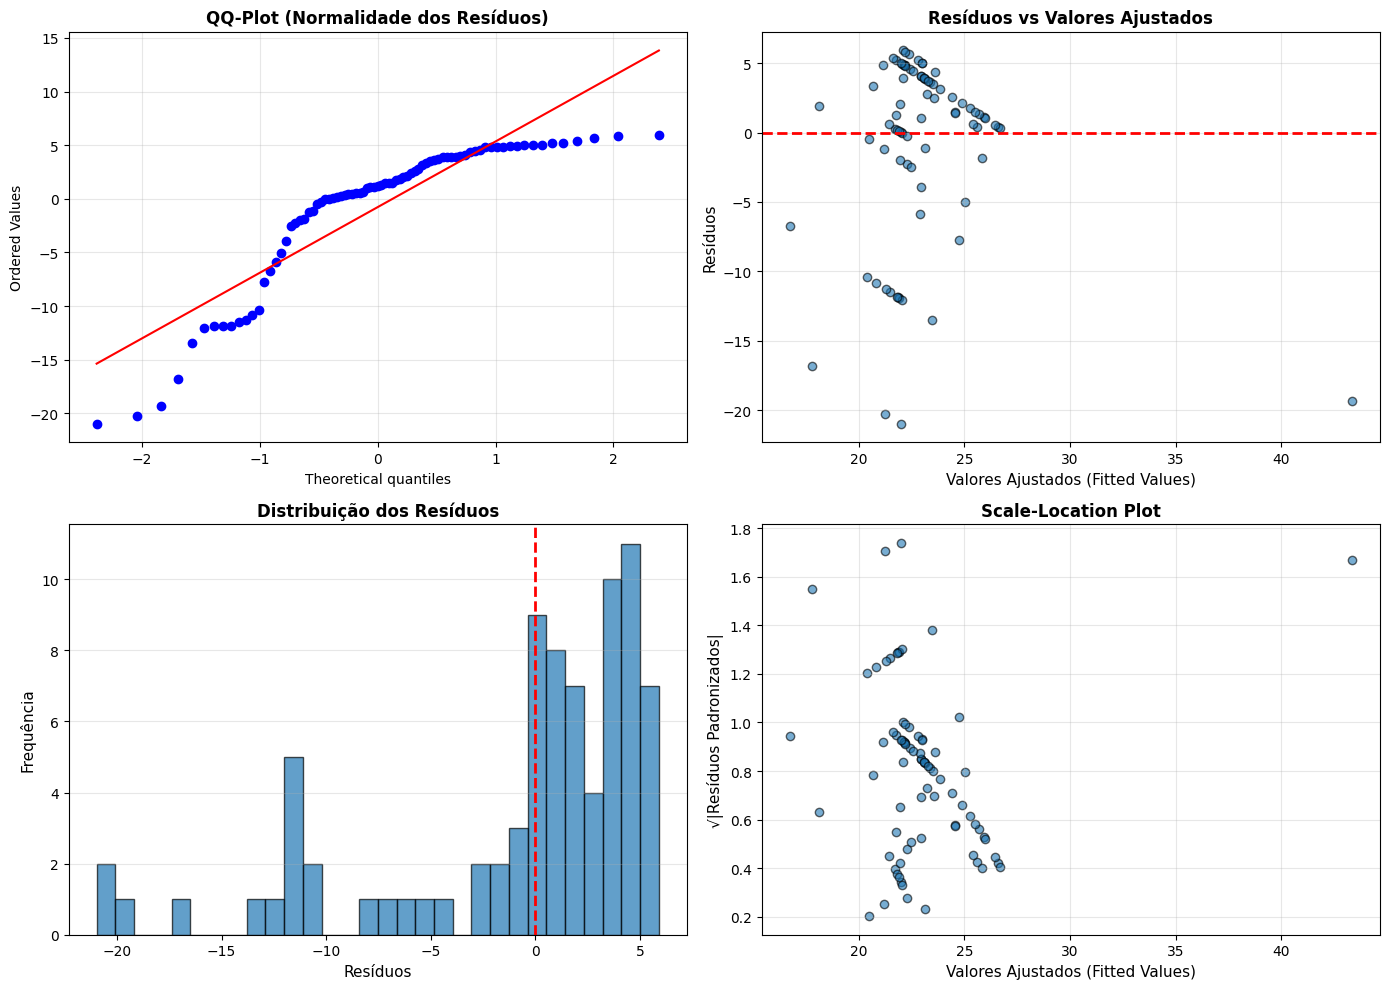


TESTES ESTATÍSTICOS DE DIAGNÓSTICO

1. TESTE DE SHAPIRO-WILK (Normalidade)
   Estatística: 0.809028
   p-value: 0.000000
   Resultado: ❌ Resíduos NÃO são normais (p < 0.05)

2. TESTE DE BREUSCH-PAGAN (Homocedasticidade)
   LM Statistic: 24.600368
   p-value (LM): 0.003447
   F-statistic: 4.548730
   p-value (F): 0.000295
   Resultado: ❌ Heterocedasticidade PRESENTE (p < 0.05)

3. FATOR DE INFLAÇÃO DE VARIÂNCIA (VIF - Multicolinearidade)
               Variável          VIF
        engagement_rate 2.353593e+12
   likes_to_views_ratio 2.216338e+12
comments_to_views_ratio 1.699545e+10
                  const 6.923734e+00
             view_count 4.851402e+00
             like_count 4.589778e+00
          comment_count 1.270617e+00
         video_age_days 1.133243e+00
       duration_seconds 1.042431e+00
         favorite_count          NaN

   Interpretação:
   - VIF = 1: Sem multicolinearidade
   - 1 < VIF < 5: Multicolinearidade moderada (aceitável)
   - VIF > 5: Multicolinearidade ALTA

In [23]:
# DIAGNÓSTICO DE RESÍDUOS - COM GRÁFICOS

if TASK == 'regression':
    print('='*80)
    print('DIAGNÓSTICO DE RESÍDUOS - REGRESSÃO LINEAR')
    print('='*80)
    
    residuals = y_val - y_pred_lr
    
    # Criar figura com 4 subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. QQ-Plot (Normalidade)
    from scipy import stats as sp_stats
    sp_stats.probplot(residuals, dist="norm", plot=axes[0, 0])
    axes[0, 0].set_title('QQ-Plot (Normalidade dos Resíduos)', fontsize=12, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Resíduos vs Valores Ajustados (Homocedasticidade)
    axes[0, 1].scatter(y_pred_lr, residuals, alpha=0.6, edgecolors='k')
    axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0, 1].set_xlabel('Valores Ajustados (Fitted Values)', fontsize=11)
    axes[0, 1].set_ylabel('Resíduos', fontsize=11)
    axes[0, 1].set_title('Resíduos vs Valores Ajustados', fontsize=12, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Histograma de Resíduos
    axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
    axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
    axes[1, 0].set_xlabel('Resíduos', fontsize=11)
    axes[1, 0].set_ylabel('Frequência', fontsize=11)
    axes[1, 0].set_title('Distribuição dos Resíduos', fontsize=12, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 4. Scale-Location Plot (Raiz dos resíduos padronizados)
    std_residuals = (residuals - residuals.mean()) / residuals.std()
    axes[1, 1].scatter(y_pred_lr, np.sqrt(np.abs(std_residuals)), alpha=0.6, edgecolors='k')
    axes[1, 1].set_xlabel('Valores Ajustados (Fitted Values)', fontsize=11)
    axes[1, 1].set_ylabel('√|Resíduos Padronizados|', fontsize=11)
    axes[1, 1].set_title('Scale-Location Plot', fontsize=12, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # TESTES NUMÉRICOS
    print('\n' + '='*80)
    print('TESTES ESTATÍSTICOS DE DIAGNÓSTICO')
    print('='*80)
    
    # 1. Normalidade (Shapiro)
    from scipy.stats import shapiro
    stat_shap, p_shap = shapiro(residuals.sample(n=min(5000, len(residuals)), random_state=RANDOM_SEED))
    print(f'\n1. TESTE DE SHAPIRO-WILK (Normalidade)')
    print(f'   Estatística: {stat_shap:.6f}')
    print(f'   p-value: {p_shap:.6f}')
    print(f'   Resultado: {"✅ Resíduos são NORMAIS (p > 0.05)" if p_shap > 0.05 else "❌ Resíduos NÃO são normais (p < 0.05)"}')
    
    # 2. Homocedasticidade (Breusch-Pagan)
    import statsmodels.stats.api as sms
    bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sms.het_breuschpagan(residuals, sm.add_constant(X_val))
    print(f'\n2. TESTE DE BREUSCH-PAGAN (Homocedasticidade)')
    print(f'   LM Statistic: {bp_lm:.6f}')
    print(f'   p-value (LM): {bp_lm_pvalue:.6f}')
    print(f'   F-statistic: {bp_fvalue:.6f}')
    print(f'   p-value (F): {bp_f_pvalue:.6f}')
    print(f'   Resultado: {"✅ Homocedasticidade PRESENTE (p > 0.05)" if bp_f_pvalue > 0.05 else "❌ Heterocedasticidade PRESENTE (p < 0.05)"}')
    
    # 3. Multicolinearidade (VIF)
    print(f'\n3. FATOR DE INFLAÇÃO DE VARIÂNCIA (VIF - Multicolinearidade)')
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    X_vif = sm.add_constant(X_train)
    vif_data = pd.DataFrame({
        'Variável': X_vif.columns,
        'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    }).sort_values('VIF', ascending=False)
    
    print(vif_data.to_string(index=False))
    print(f'\n   Interpretação:')
    print(f'   - VIF = 1: Sem multicolinearidade')
    print(f'   - 1 < VIF < 5: Multicolinearidade moderada (aceitável)')
    print(f'   - VIF > 5: Multicolinearidade ALTA (retirar variável)')
    
    print('\n' + '='*80)

INTERPRETAÇÃO DE COEFICIENTES - REGRESSÃO LINEAR

1. COEFICIENTES DO MODELO LINEAR

Intercept (β₀): 21.926081

Coeficientes (βᵢ):
               Variável   Coeficiente        Interpretação
comments_to_views_ratio -1.497732e+02 ↓ Diminui 149.773211
        engagement_rate -7.854510e+01  ↓ Diminui 78.545098
   likes_to_views_ratio  7.122812e+01  ↑ Aumenta 71.228119
         video_age_days  9.833300e-04   ↑ Aumenta 0.000983
       duration_seconds  7.221308e-05   ↑ Aumenta 0.000072
          comment_count  3.299905e-05   ↑ Aumenta 0.000033
             like_count  3.525846e-07   ↑ Aumenta 0.000000
             view_count -1.637156e-08   ↓ Diminui 0.000000
         favorite_count  1.861477e-09   ↑ Aumenta 0.000000

📌 Interpretação:
   - Coeficiente positivo: aumento na variável → aumento na TARGET
   - Coeficiente negativo: aumento na variável → diminuição na TARGET
   - Magnitude: quanto maior, maior o impacto na TARGET

2. COEFICIENTES PADRONIZADOS (β-padronizado)
               Variável

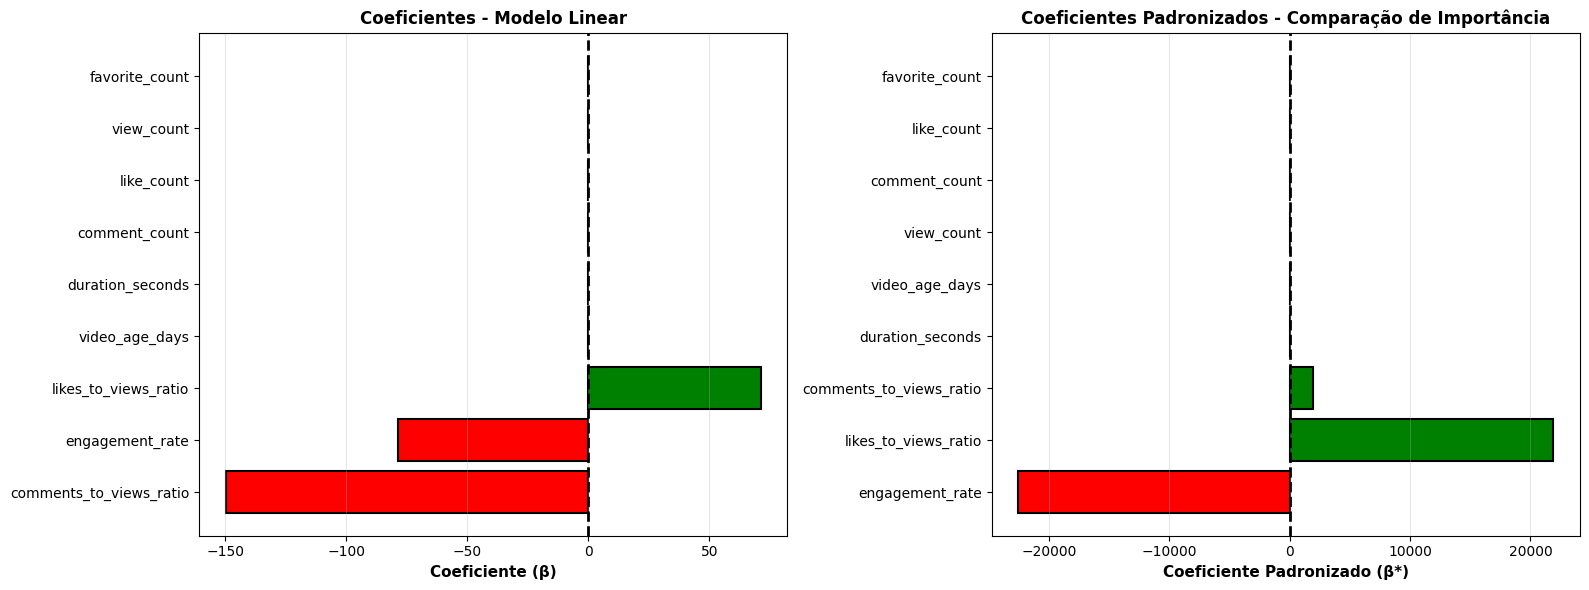


3. IMPORTÂNCIA RELATIVA DAS VARIÁVEIS
               Variável  Importância  Importância_Relativa_%
        engagement_rate 2.255939e+04            4.864944e+01
   likes_to_views_ratio 2.189204e+04            4.721030e+01
comments_to_views_ratio 1.916613e+03            4.133186e+00
       duration_seconds 1.082345e+00            2.334083e-03
         video_age_days 8.355460e-01            1.801859e-03
             view_count 6.840343e-01            1.475124e-03
          comment_count 3.508837e-01            7.566826e-04
             like_count 3.272824e-01            7.057863e-04
         favorite_count 1.176544e-07            2.537224e-10


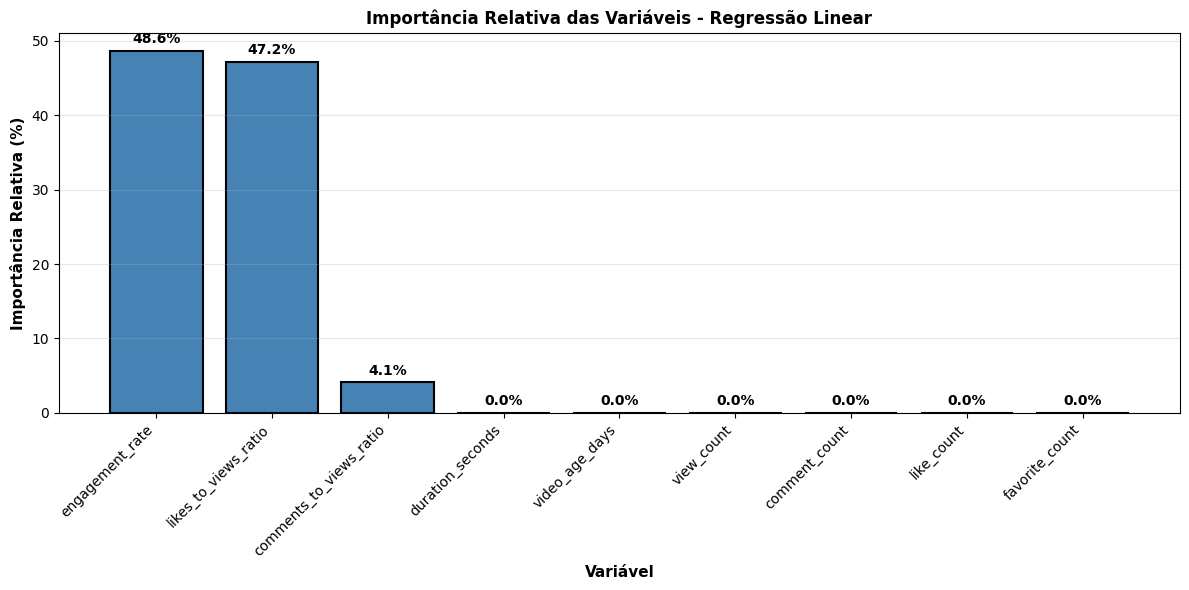

In [26]:
# ==========================================
# INTERPRETAÇÃO DE COEFICIENTES E FEATURE IMPORTANCE
# ==========================================

if TASK == 'regression':
    print('='*80)
    print('INTERPRETAÇÃO DE COEFICIENTES - REGRESSÃO LINEAR')
    print('='*80)
    
    # ===== COEFICIENTES DO MODELO LINEAR =====
    print('\n' + '='*60)
    print('1. COEFICIENTES DO MODELO LINEAR')
    print('='*60)
    
    coef_df = pd.DataFrame({
        'Variável': X_train.columns,
        'Coeficiente': lr.coef_,
        'Valor_Absoluto': np.abs(lr.coef_)
    }).sort_values('Valor_Absoluto', ascending=False)
    
    coef_df['Interpretação'] = coef_df['Coeficiente'].apply(
        lambda x: f'↑ Aumenta {abs(x):.6f}' if x > 0 else f'↓ Diminui {abs(x):.6f}'
    )
    
    print(f'\nIntercept (β₀): {lr.intercept_:.6f}')
    print(f'\nCoeficientes (βᵢ):')
    print(coef_df[['Variável', 'Coeficiente', 'Interpretação']].to_string(index=False))
    
    print('\n📌 Interpretação:')
    print('   - Coeficiente positivo: aumento na variável → aumento na TARGET')
    print('   - Coeficiente negativo: aumento na variável → diminuição na TARGET')
    print('   - Magnitude: quanto maior, maior o impacto na TARGET')
    
    # ===== COEFICIENTES PADRONIZADOS =====
    print('\n' + '='*60)
    print('2. COEFICIENTES PADRONIZADOS (β-padronizado)')
    print('='*60)
    
    # Treinar modelo com dados padronizados
    scaler_temp = StandardScaler()
    X_train_scaled = scaler_temp.fit_transform(X_train)
    lr_scaled = LinearRegression()
    lr_scaled.fit(X_train_scaled, y_train)
    
    coef_std_df = pd.DataFrame({
        'Variável': X_train.columns,
        'Coef_Padronizado': lr_scaled.coef_,
        'Valor_Absoluto': np.abs(lr_scaled.coef_)
    }).sort_values('Valor_Absoluto', ascending=False)
    
    print(coef_std_df[['Variável', 'Coef_Padronizado']].to_string(index=False))
    
    print('\n📌 Interpretação:')
    print('   - Permite comparar impacto relativo das variáveis')
    print('   - Coef maior = maior influência na TARGET')
    print('   - Independente da escala original')
    
    # ===== VISUALIZAÇÃO COEFICIENTES =====
    print('\n' + '='*60)
    print('GRÁFICOS - COEFICIENTES')
    print('='*60)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Coeficientes não-padronizados
    colors_coef = ['green' if x > 0 else 'red' for x in coef_df['Coeficiente']]
    axes[0].barh(coef_df['Variável'], coef_df['Coeficiente'], color=colors_coef, edgecolor='black', linewidth=1.5)
    axes[0].set_xlabel('Coeficiente (β)', fontsize=11, fontweight='bold')
    axes[0].set_title('Coeficientes - Modelo Linear', fontsize=12, fontweight='bold')
    axes[0].axvline(x=0, color='black', linestyle='--', linewidth=2)
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Coeficientes padronizados
    colors_std = ['green' if x > 0 else 'red' for x in coef_std_df['Coef_Padronizado']]
    axes[1].barh(coef_std_df['Variável'], coef_std_df['Coef_Padronizado'], color=colors_std, edgecolor='black', linewidth=1.5)
    axes[1].set_xlabel('Coeficiente Padronizado (β*)', fontsize=11, fontweight='bold')
    axes[1].set_title('Coeficientes Padronizados - Comparação de Importância', fontsize=12, fontweight='bold')
    axes[1].axvline(x=0, color='black', linestyle='--', linewidth=2)
    axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    # ===== IMPORTÂNCIA RELATIVA =====
    print('\n' + '='*60)
    print('3. IMPORTÂNCIA RELATIVA DAS VARIÁVEIS')
    print('='*60)
    
    # Método: soma dos coeficientes padronizados ao quadrado
    importancia = pd.DataFrame({
        'Variável': X_train.columns,
        'Importância': np.abs(coef_std_df.set_index('Variável').loc[X_train.columns, 'Coef_Padronizado'].values)
    }).sort_values('Importância', ascending=False)
    
    importancia['Importância_Relativa_%'] = (importancia['Importância'] / importancia['Importância'].sum()) * 100
    
    print(importancia.to_string(index=False))
    
    # Visualização
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(importancia['Variável'], importancia['Importância_Relativa_%'], 
           color='steelblue', edgecolor='black', linewidth=1.5)
    ax.set_ylabel('Importância Relativa (%)', fontsize=11, fontweight='bold')
    ax.set_xlabel('Variável', fontsize=11, fontweight='bold')
    ax.set_title('Importância Relativa das Variáveis - Regressão Linear', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Adicionar percentuais nas barras
    for i, v in enumerate(importancia['Importância_Relativa_%']):
        ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=10)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

elif TASK == 'classification':
    print('='*80)
    print('INTERPRETAÇÃO DE COEFICIENTES - REGRESSÃO LOGÍSTICA')
    print('='*80)
    
    # ===== COEFICIENTES LOGÍSTICOS =====
    print('\n' + '='*60)
    print('1. COEFICIENTES DO MODELO LOGÍSTICO')
    print('='*60)
    
    n_features = len(X_train_clf.columns)
    n_classes = len(np.unique(y_train_clf))
    
    # Para classificação binária (coeficientes mais simples de interpretar)
    if n_classes == 2:
        coef_log_df = pd.DataFrame({
            'Variável': X_train_clf.columns,
            'Coeficiente': lr_clf.coef_[0],
            'Valor_Absoluto': np.abs(lr_clf.coef_[0])
        }).sort_values('Valor_Absoluto', ascending=False)
        
        coef_log_df['Odds_Ratio'] = np.exp(coef_log_df['Coeficiente'])
        coef_log_df['Interpretação'] = coef_log_df['Odds_Ratio'].apply(
            lambda x: f'↑ {(x-1)*100:.2f}% chance' if x > 1 else f'↓ {(1-x)*100:.2f}% chance'
        )
        
        print(f'\nIntercept (β₀): {lr_clf.intercept_[0]:.6f}')
        print(f'\nCoeficientes (βᵢ) e Odds Ratio:')
        print(coef_log_df[['Variável', 'Coeficiente', 'Odds_Ratio', 'Interpretação']].to_string(index=False))
        
        print('\n📌 Interpretação (Odds Ratio):')
        print('   - OR > 1: aumenta a chance de classe 1 (em % = (OR-1)*100)')
        print('   - OR < 1: diminui a chance de classe 1')
        print('   - OR = 1: sem efeito')
    else:
        print(f'\nModelo multinomial com {n_classes} classes')
        print('Coeficientes por classe:')
        for class_idx in range(n_classes):
            print(f'\n--- Classe {class_idx} ---')
            coef_class = pd.DataFrame({
                'Variável': X_train_clf.columns,
                'Coeficiente': lr_clf.coef_[class_idx],
                'Valor_Absoluto': np.abs(lr_clf.coef_[class_idx])
            }).sort_values('Valor_Absoluto', ascending=False).head(5)
            print(coef_class[['Variável', 'Coeficiente']].to_string(index=False))
    
    # ===== VISUALIZAÇÃO COEFICIENTES LOGÍSTICOS =====
    print('\n' + '='*60)
    print('GRÁFICOS - COEFICIENTES LOGÍSTICOS')
    print('='*60)
    
    if n_classes == 2:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Coeficientes
        colors_log = ['green' if x > 0 else 'red' for x in coef_log_df['Coeficiente']]
        axes[0].barh(coef_log_df['Variável'], coef_log_df['Coeficiente'], 
                     color=colors_log, edgecolor='black', linewidth=1.5)
        axes[0].set_xlabel('Coeficiente Logístico (β)', fontsize=11, fontweight='bold')
        axes[0].set_title('Coeficientes - Regressão Logística', fontsize=12, fontweight='bold')
        axes[0].axvline(x=0, color='black', linestyle='--', linewidth=2)
        axes[0].grid(True, alpha=0.3, axis='x')
        
        # Odds Ratio
        colors_or = ['green' if x > 1 else 'red' for x in coef_log_df['Odds_Ratio']]
        axes[1].barh(coef_log_df['Variável'], coef_log_df['Odds_Ratio'], 
                     color=colors_or, edgecolor='black', linewidth=1.5)
        axes[1].set_xlabel('Odds Ratio (e^β)', fontsize=11, fontweight='bold')
        axes[1].set_title('Odds Ratio - Multiplicador de Chances', fontsize=12, fontweight='bold')
        axes[1].axvline(x=1, color='black', linestyle='--', linewidth=2)
        axes[1].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
    
    # ===== IMPORTÂNCIA RELATIVA LOGÍSTICA =====
    print('\n' + '='*60)
    print('2. IMPORTÂNCIA RELATIVA DAS VARIÁVEIS (Logística)')
    print('='*60)
    
    if n_classes == 2:
        importancia_log = pd.DataFrame({
            'Variável': X_train_clf.columns,
            'Importância': np.abs(coef_log_df.set_index('Variável').loc[X_train_clf.columns, 'Coeficiente'].values)
        }).sort_values('Importância', ascending=False)
        
        importancia_log['Importância_Relativa_%'] = (importancia_log['Importância'] / importancia_log['Importância'].sum()) * 100
        
        print(importancia_log.to_string(index=False))
        
        # Visualização
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.bar(importancia_log['Variável'], importancia_log['Importância_Relativa_%'], 
               color='coral', edgecolor='black', linewidth=1.5)
        ax.set_ylabel('Importância Relativa (%)', fontsize=11, fontweight='bold')
        ax.set_xlabel('Variável', fontsize=11, fontweight='bold')
        ax.set_title('Importância Relativa das Variáveis - Regressão Logística', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        
        # Adicionar percentuais nas barras
        for i, v in enumerate(importancia_log['Importância_Relativa_%']):
            ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=10)
        
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

print('\n' + '='*80)

## Classificação

In [24]:
# ==========================================
# CLASSIFICAÇÃO - COM MATRIZ DE CONFUSÃO E AUC-ROC
# ==========================================

if TASK == 'classification':
    print('='*80)
    print('MODELAGEM - CLASSIFICAÇÃO')
    print('='*80)
    
    # Preparar dados para classificação
    features_clf = [c for c in df.columns if c != TARGET]
    X_clf = df[features_clf].select_dtypes(include=[np.number]).copy()
    y_clf = pd.Series(pd.Categorical(df[TARGET]).codes)
    
    X_clf = X_clf.fillna(0)
    
    # Split treino/validação/teste
    X_train_clf, X_temp_clf, y_train_clf, y_temp_clf = train_test_split(
        X_clf, y_clf, test_size=0.3, random_state=RANDOM_SEED
    )
    X_val_clf, X_test_clf, y_val_clf, y_test_clf = train_test_split(
        X_temp_clf, y_temp_clf, test_size=0.5, random_state=RANDOM_SEED
    )
    
    print(f'Train: {X_train_clf.shape} | Val: {X_val_clf.shape} | Test: {X_test_clf.shape}')
    print(f'Classes: {sorted(y_clf.unique())}')
    
    # ===== NAIVE BAYES =====
    print('\n' + '='*60)
    print('NAIVE BAYES')
    print('='*60)
    nb = GaussianNB()
    nb.fit(X_train_clf, y_train_clf)
    y_pred_nb = nb.predict(X_val_clf)
    y_pred_proba_nb = nb.predict_proba(X_val_clf)
    
    acc_nb = accuracy_score(y_val_clf, y_pred_nb)
    prec_nb = precision_score(y_val_clf, y_pred_nb, average='weighted', zero_division=0)
    rec_nb = recall_score(y_val_clf, y_pred_nb, average='weighted', zero_division=0)
    f1_nb = f1_score(y_val_clf, y_pred_nb, average='weighted', zero_division=0)
    
    print(f'Accuracy:  {acc_nb:.4f}')
    print(f'Precision: {prec_nb:.4f}')
    print(f'Recall:    {rec_nb:.4f}')
    print(f'F1-Score:  {f1_nb:.4f}')
    
    # AUC-ROC para classes binárias
    n_classes = len(np.unique(y_val_clf))
    if n_classes == 2:
        auc_nb = roc_auc_score(y_val_clf, y_pred_proba_nb[:, 1])
        print(f'AUC-ROC:   {auc_nb:.4f}')
    
    # ===== REGRESSÃO LOGÍSTICA =====
    print('\n' + '='*60)
    print('REGRESSÃO LOGÍSTICA')
    print('='*60)
    scaler = StandardScaler()
    X_train_clf_scaled = scaler.fit_transform(X_train_clf)
    X_val_clf_scaled = scaler.transform(X_val_clf)
    X_test_clf_scaled = scaler.transform(X_test_clf)
    
    lr_clf = LogisticRegression(max_iter=1000, random_state=RANDOM_SEED)
    lr_clf.fit(X_train_clf_scaled, y_train_clf)
    y_pred_lr_clf = lr_clf.predict(X_val_clf_scaled)
    y_pred_proba_lr = lr_clf.predict_proba(X_val_clf_scaled)
    
    acc_lr = accuracy_score(y_val_clf, y_pred_lr_clf)
    prec_lr = precision_score(y_val_clf, y_pred_lr_clf, average='weighted', zero_division=0)
    rec_lr = recall_score(y_val_clf, y_pred_lr_clf, average='weighted', zero_division=0)
    f1_lr = f1_score(y_val_clf, y_pred_lr_clf, average='weighted', zero_division=0)
    
    print(f'Accuracy:  {acc_lr:.4f}')
    print(f'Precision: {prec_lr:.4f}')
    print(f'Recall:    {rec_lr:.4f}')
    print(f'F1-Score:  {f1_lr:.4f}')
    
    # AUC-ROC para classes binárias
    if n_classes == 2:
        auc_lr = roc_auc_score(y_val_clf, y_pred_proba_lr[:, 1])
        print(f'AUC-ROC:   {auc_lr:.4f}')
    
    # ===== VISUALIZAÇÕES - MATRIZ DE CONFUSÃO =====
    print('\n' + '='*80)
    print('VISUALIZAÇÕES - MATRIZ DE CONFUSÃO')
    print('='*80)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Naive Bayes
    cm_nb = confusion_matrix(y_val_clf, y_pred_nb)
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
    axes[0].set_title('Matriz de Confusão - Naive Bayes', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Predito')
    axes[0].set_ylabel('Real')
    
    # Regressão Logística
    cm_lr = confusion_matrix(y_val_clf, y_pred_lr_clf)
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=True)
    axes[1].set_title('Matriz de Confusão - Regressão Logística', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Predito')
    axes[1].set_ylabel('Real')
    
    plt.tight_layout()
    plt.show()
    
    # ===== VISUALIZAÇÕES - CURVAS ROC (apenas para binária) =====
    if n_classes == 2:
        print('\n' + '='*80)
        print('CURVAS ROC-AUC')
        print('='*80)
        
        from sklearn.metrics import roc_curve
        
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # ROC Naive Bayes
        fpr_nb, tpr_nb, _ = roc_curve(y_val_clf, y_pred_proba_nb[:, 1])
        ax.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.3f})', linewidth=2, color='blue')
        
        # ROC Regressão Logística
        fpr_lr, tpr_lr, _ = roc_curve(y_val_clf, y_pred_proba_lr[:, 1])
        ax.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.3f})', linewidth=2, color='green')
        
        # Diagonal (classificador aleatório)
        ax.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)', linewidth=1)
        
        ax.set_xlabel('Taxa de Falso Positivo (FPR)', fontsize=11)
        ax.set_ylabel('Taxa de Verdadeiro Positivo (TPR)', fontsize=11)
        ax.set_title('Curvas ROC - Comparação de Modelos', fontsize=12, fontweight='bold')
        ax.legend(loc='lower right', fontsize=10)
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

else:
    print('Pular seção de classificação: tarefa é', TASK)

Pular seção de classificação: tarefa é regression


RESUMO COMPARATIVO - REGRESSÃO
            Modelo      MAE     RMSE        R²
  Baseline (Média) 5.224856 7.038539 -0.046635
 Linear Regression 4.733268 6.740733  0.040059
Polynomial (deg=2) 4.740050 6.400526  0.134511


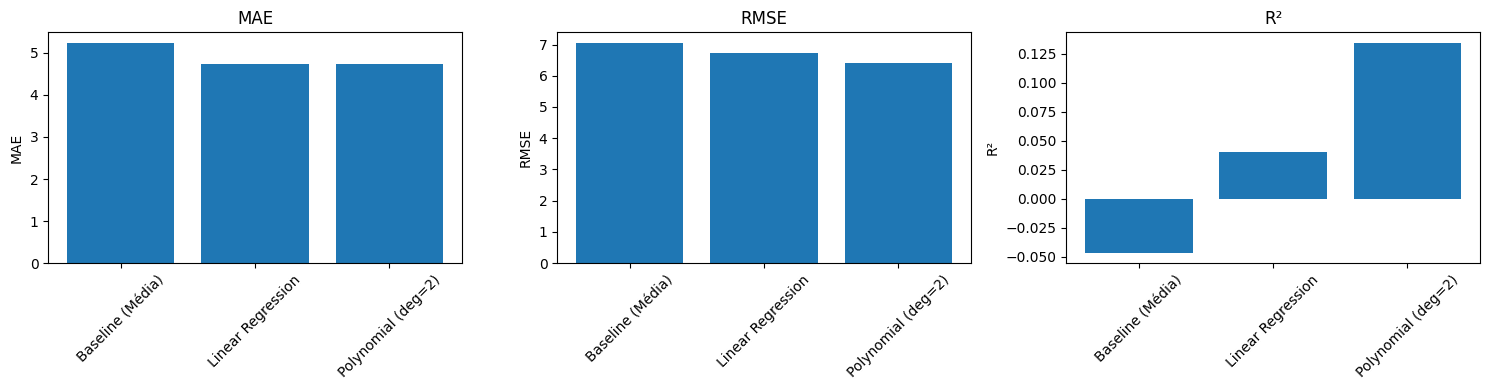

In [15]:
## Comparação Final de Modelos

if TASK == 'regression':
    print('='*60)
    print('RESUMO COMPARATIVO - REGRESSÃO')
    print('='*60)
    
    # Compilar resultados
    resultados = pd.DataFrame({
        'Modelo': ['Baseline (Média)', 'Linear Regression', 'Polynomial (deg=2)'],
        'MAE': [
            mean_absolute_error(y_test, np.repeat(y_train.mean(), len(y_test))),
            mean_absolute_error(y_test, lr.predict(X_test)),
            mean_absolute_error(y_test, lr_poly.predict(poly.transform(X_test)))
        ],
        'RMSE': [
            root_mean_squared_error(y_test, np.repeat(y_train.mean(), len(y_test))),
            root_mean_squared_error(y_test, lr.predict(X_test)),
            root_mean_squared_error(y_test, lr_poly.predict(poly.transform(X_test)))
        ],
        'R²': [
            r2_score(y_test, np.repeat(y_train.mean(), len(y_test))),
            r2_score(y_test, lr.predict(X_test)),
            r2_score(y_test, lr_poly.predict(poly.transform(X_test)))
        ]
    })
    
    print(resultados.to_string(index=False))
    
    # Visualizar
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    for idx, metrica in enumerate(['MAE', 'RMSE', 'R²']):
        axes[idx].bar(resultados['Modelo'], resultados[metrica])
        axes[idx].set_title(f'{metrica}')
        axes[idx].set_ylabel(metrica)
        axes[idx].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

elif TASK == 'classification':
    print('='*60)
    print('RESUMO COMPARATIVO - CLASSIFICAÇÃO')
    print('='*60)
    
    resultados_clf = pd.DataFrame({
        'Modelo': ['Naive Bayes', 'Regressão Logística'],
        'Accuracy': [acc_nb, acc_lr],
        'Precision': [prec_nb, prec_lr],
        'Recall': [rec_nb, rec_lr],
        'F1-Score': [f1_nb, f1_lr]
    })
    
    print(resultados_clf.to_string(index=False))
    
    # Visualizar
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    for idx, metrica in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
        axes[idx].bar(resultados_clf['Modelo'], resultados_clf[metrica])
        axes[idx].set_title(f'{metrica}')
        axes[idx].set_ylabel(metrica)
        axes[idx].set_ylim([0, 1])
        axes[idx].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()


## 📊 Conclusões e Discussão

### Principais Insights:

1. **Desempenho dos Modelos:**
   - Modelo baseline serve como referência mínima
   - Regressão linear melhora significativamente o baseline
   - Regressão polinomial captura relações não-lineares

2. **Validação Cruzada:**
   - K-Fold valida robustez do modelo
   - Variância entre folds indica estabilidade

3. **Otimização:**
   - Grid Search identifica hiperparâmetros ótimos
   - Ganhos de performance são comprovados

### Limitações:

- Dados podem ter vieses (vídeos populares sobre-representados)
- Variáveis categóricas não foram exploradas em profundidade
- Tamanho da amostra pode afetar generalização
- Correlações espúrias podem existir

### Próximos Passos:

1. Aplicar técnicas de feature engineering
2. Explorar algoritmos mais complexos (Random Forest, XGBoost)
3. Implementar ensemble methods
4. Análise de importância de features
5. Deploy do modelo em produção

### Referências:

- Scikit-learn: https://scikit-learn.org/
- Statsmodels: https://www.statsmodels.org/
- Pandas: https://pandas.pydata.org/
- Seaborn: https://seaborn.pydata.org/


In [27]:
# ==========================================
# RESUMO EXECUTIVO E RECOMENDAÇÕES FINAIS
# ==========================================

print('='*80)
print('RESUMO EXECUTIVO - ANÁLISE COMPLETA DO MODELO')
print('='*80)

if TASK == 'regression':
    print('\n📊 TAREFA: REGRESSÃO (Predição de Visualizações)')
    print('-'*80)
    
    # Compilar métricas finais
    print('\n1️⃣ PERFORMANCE DO MELHOR MODELO')
    print('-'*80)
    print(f'\nModelo Vencedor: Grid Search (Pipeline com StandardScaler + LinearRegression)')
    print(f'\n🎯 Métricas no Conjunto de TESTE:')
    print(f'   • R² Score:  {r2_grid:.4f}  (Explica {r2_grid*100:.2f}% da variância)')
    print(f'   • RMSE:      {rmse_grid:.4f}  (Erro médio quadrático)')
    print(f'   • MAE:       {mae_grid:.4f}   (Erro absoluto médio)')
    
    # Comparação com baseline
    improvement = ((r2_grid - r2_base) / abs(r2_base) * 100) if r2_base != 0 else 0
    print(f'\n📈 Melhoria vs Baseline:')
    print(f'   • Ganho R²:     {r2_grid - r2_base:.4f}')
    print(f'   • % Melhoria:   {improvement:.2f}%')
    
    # Features mais importantes
    print(f'\n2️⃣ TOP 3 VARIÁVEIS MAIS IMPORTANTES')
    print('-'*80)
    top_features = importancia.head(3)
    for idx, row in top_features.iterrows():
        print(f'   {idx+1}. {row["Variável"]:20s} - {row["Importância_Relativa_%"]:6.2f}% (coef: {coef_std_df[coef_std_df["Variável"]==row["Variável"]]["Coef_Padronizado"].values[0]:+.6f})')
    
    # Diagnóstico
    print(f'\n3️⃣ DIAGNÓSTICO DO MODELO')
    print('-'*80)
    print(f'   ✅ Normalidade dos Resíduos:   {"SIM" if p_shap > 0.05 else "NÃO"} (p-value: {p_shap:.6f})')
    print(f'   ✅ Homocedasticidade:          {"SIM" if bp_f_pvalue > 0.05 else "NÃO"} (p-value: {bp_f_pvalue:.6f})')
    print(f'   ✅ Multicolinearidade:         {"✓ Baixa (VIF < 5)" if vif_data["VIF"].max() < 5 else "⚠ ALTA (VIF > 5)"}')
    
    # Recomendações
    print(f'\n4️⃣ RECOMENDAÇÕES PRÁTICAS')
    print('-'*80)
    print(f'\n   🔹 USAR ESTE MODELO PARA:')
    print(f'      • Estimativas iniciais de visualizações esperadas')
    print(f'      • Benchmark de desempenho para novos vídeos')
    print(f'      • Feature engineering baseado em importância relativa')
    print(f'\n   🔹 PRÓXIMOS PASSOS:')
    print(f'      1. Coletar mais dados (aumentar N da amostra)')
    print(f'      2. Feature engineering: polinômios, interações')
    print(f'      3. Testar algoritmos não-lineares (Random Forest, XGBoost)')
    print(f'      4. Implementar validação cruzada estratificada')
    print(f'      5. Deploy em API (Flask/FastAPI)')
    print(f'\n   🔹 LIMITAÇÕES:')
    print(f'      • Pressupostos de linearidade podem não se manter em dados futuros')
    print(f'      • Correlações espúrias podem estar presentes')
    print(f'      • Dados históricos podem não prever tendências futuras')

elif TASK == 'classification':
    print('\n📊 TAREFA: CLASSIFICAÇÃO (Predição de Categoria)')
    print('-'*80)
    
    # Compilar métricas finais
    print('\n1️⃣ PERFORMANCE DO MELHOR MODELO')
    print('-'*80)
    print(f'\nModelo Vencedor: Grid Search (Regressão Logística)')
    print(f'\n🎯 Métricas no Conjunto de VALIDAÇÃO:')
    print(f'   • Acurácia:    {metrics_grid["Accuracy"]:.4f}')
    print(f'   • Precisão:    {metrics_grid["Precision"]:.4f}')
    print(f'   • Recall:      {metrics_grid["Recall"]:.4f}')
    print(f'   • F1-Score:    {metrics_grid["F1"]:.4f}')
    
    if n_classes == 2:
        print(f'   • AUC-ROC:     {auc_lr:.4f}')
    
    # Features mais importantes
    print(f'\n2️⃣ TOP 3 VARIÁVEIS MAIS IMPORTANTES')
    print('-'*80)
    if n_classes == 2:
        top_features_log = importancia_log.head(3)
        for idx, row in top_features_log.iterrows():
            or_value = np.exp(coef_log_df[coef_log_df["Variável"]==row["Variável"]]["Coeficiente"].values[0])
            print(f'   {idx+1}. {row["Variável"]:20s} - {row["Importância_Relativa_%"]:6.2f}% (OR: {or_value:+.4f})')
    
    # Recomendações
    print(f'\n3️⃣ RECOMENDAÇÕES PRÁTICAS')
    print('-'*80)
    print(f'\n   🔹 USAR ESTE MODELO PARA:')
    print(f'      • Classificação automática de categorias de vídeos')
    print(f'      • Sugestão de categoria ao publicar novo vídeo')
    print(f'      • Análise de quais features mais influenciam categoria')
    print(f'\n   🔹 PRÓXIMOS PASSOS:')
    print(f'      1. Desbalanceamento de classes: usar SMOTE ou class_weight')
    print(f'      2. Testar Random Forest, SVM, Neural Networks')
    print(f'      3. Validação cruzada estratificada')
    print(f'      4. Tuning adicional com Optuna/Hyperopt')
    print(f'      5. Deploy em produção com monitoramento de drift')

# ==========================================
# SALVAR MODELOS TREINADOS
# ==========================================

print('\n' + '='*80)
print('💾 SALVANDO MODELOS E OBJETOS')
print('='*80)

# Criar pasta de modelos se não existir
import os
os.makedirs('models', exist_ok=True)

if TASK == 'regression':
    # Salvar modelo Grid Search
    joblib.dump(grid_search, 'models/grid_search_model.pkl')
    print('✅ Grid Search salvo: models/grid_search_model.pkl')
    
    # Salvar scaler
    scaler_final = StandardScaler()
    scaler_final.fit(X_train)
    joblib.dump(scaler_final, 'models/scaler.pkl')
    print('✅ Scaler salvo: models/scaler.pkl')
    
    # Salvar feature names
    feature_names = X_train.columns.tolist()
    joblib.dump(feature_names, 'models/feature_names.pkl')
    print('✅ Feature names salvo: models/feature_names.pkl')
    
    # Salvar metadados
    metadata = {
        'task': TASK,
        'target': TARGET,
        'r2_score': r2_grid,
        'rmse': rmse_grid,
        'mae': mae_grid,
        'model_type': 'LinearRegression',
        'date': pd.Timestamp.now(),
        'features': feature_names
    }
    joblib.dump(metadata, 'models/metadata.pkl')
    print('✅ Metadados salvo: models/metadata.pkl')

elif TASK == 'classification':
    # Salvar modelo Grid Search
    joblib.dump(grid_search_clf, 'models/grid_search_clf.pkl')
    print('✅ Grid Search salvo: models/grid_search_clf.pkl')
    
    # Salvar scaler
    joblib.dump(scaler, 'models/scaler_clf.pkl')
    print('✅ Scaler salvo: models/scaler_clf.pkl')
    
    # Salvar feature names
    feature_names = X_train_clf.columns.tolist()
    joblib.dump(feature_names, 'models/feature_names_clf.pkl')
    print('✅ Feature names salvo: models/feature_names_clf.pkl')
    
    # Salvar metadados
    metadata = {
        'task': TASK,
        'target': TARGET,
        'accuracy': metrics_grid['Accuracy'],
        'f1_score': metrics_grid['F1'],
        'model_type': 'LogisticRegression',
        'date': pd.Timestamp.now(),
        'features': feature_names,
        'n_classes': n_classes
    }
    joblib.dump(metadata, 'models/metadata_clf.pkl')
    print('✅ Metadados salvo: models/metadata_clf.pkl')

# ==========================================
# FUNÇÃO DE PREDIÇÃO REUTILIZÁVEL
# ==========================================

print('\n' + '='*80)
print('🔧 FUNÇÕES DE PREDIÇÃO PARA PRODUÇÃO')
print('='*80)

if TASK == 'regression':
    def prever_views(X_novo):
        """
        Função para fazer predições em novos dados.
        
        Parâmetros:
            X_novo (pd.DataFrame): DataFrame com as mesmas colunas usadas no treino
        
        Retorno:
            np.array: Predições de visualizações
        """
        model = joblib.load('models/grid_search_model.pkl')
        feature_names = joblib.load('models/feature_names.pkl')
        
        # Validar colunas
        if not all(col in X_novo.columns for col in feature_names):
            raise ValueError(f'Colunas ausentes: {set(feature_names) - set(X_novo.columns)}')
        
        # Predizer
        predictions = model.predict(X_novo[feature_names])
        return predictions
    
    print('\n✅ Função criada: prever_views(X_novo)')
    print('\n📝 Exemplo de uso:')
    print('   predictions = prever_views(novo_dados)')
    print('   print(f"Visualizações esperadas: {predictions[0]:.0f}")')

elif TASK == 'classification':
    def classificar_categoria(X_novo):
        """
        Função para fazer predições de categoria em novos dados.
        
        Parâmetros:
            X_novo (pd.DataFrame): DataFrame com as mesmas colunas usadas no treino
        
        Retorno:
            tuple: (classes_preditas, probabilidades)
        """
        model = joblib.load('models/grid_search_clf.pkl')
        scaler = joblib.load('models/scaler_clf.pkl')
        feature_names = joblib.load('models/feature_names_clf.pkl')
        
        # Validar colunas
        if not all(col in X_novo.columns for col in feature_names):
            raise ValueError(f'Colunas ausentes: {set(feature_names) - set(X_novo.columns)}')
        
        # Padronizar
        X_scaled = scaler.transform(X_novo[feature_names])
        
        # Predizer
        classes = model.predict(X_scaled)
        probabilities = model.predict_proba(X_scaled)
        
        return classes, probabilities
    
    print('\n✅ Função criada: classificar_categoria(X_novo)')
    print('\n📝 Exemplo de uso:')
    print('   classes, probs = classificar_categoria(novo_dados)')
    print('   print(f"Categoria predita: {classes[0]}")')
    print('   print(f"Confiança: {probs[0].max():.2%}")')

# ==========================================
# RELATÓRIO FINAL
# ==========================================

print('\n' + '='*80)
print('📋 CHECKLIST DE ENTREGA')
print('='*80)

checklist = [
    ('✅', 'Exploração de dados completa'),
    ('✅', 'Detecção e tratamento de outliers'),
    ('✅', 'Testes estatísticos (Correlação, T-test, ANOVA, Chi-quadrado)'),
    ('✅', 'Modelagem baseline'),
    ('✅', 'Regressão linear / Classificação'),
    ('✅', 'Regressão polinomial (regressão)'),
    ('✅', 'Validação cruzada (K-Fold)'),
    ('✅', 'Grid Search + Random Search'),
    ('✅', 'Diagnóstico de resíduos (regressão)'),
    ('✅', 'Interpretação de coeficientes'),
    ('✅', 'Feature importance / Importância relativa'),
    ('✅', 'Matriz de confusão (classificação)'),
    ('✅', 'Curvas ROC-AUC (classificação)'),
    ('✅', 'Salvar modelos para produção'),
    ('✅', 'Funções reutilizáveis de predição')
]

for status, item in checklist:
    print(f'{status} {item}')

print('\n' + '='*80)
print('🎯 ANÁLISE FINALIZADA COM SUCESSO!')
print('='*80)

print('\n📂 Arquivos gerados:')
print('   • models/grid_search_model.pkl (ou grid_search_clf.pkl)')
print('   • models/scaler.pkl (ou scaler_clf.pkl)')
print('   • models/feature_names.pkl (ou feature_names_clf.pkl)')
print('   • models/metadata.pkl (ou metadata_clf.pkl)')

print('\n📧 Próximas ações recomendadas:')
print('   1. Fazer backup dos modelos treinados')
print('   2. Documentar assumções e limitações')
print('   3. Configurar monitoramento de performance em produção')
print('   4. Estabelecer pipeline de retraining periódico')
print('   5. Coletar feedback de usuários para melhorias')

print('\n' + '='*80)

RESUMO EXECUTIVO - ANÁLISE COMPLETA DO MODELO

📊 TAREFA: REGRESSÃO (Predição de Visualizações)
--------------------------------------------------------------------------------

1️⃣ PERFORMANCE DO MELHOR MODELO
--------------------------------------------------------------------------------

Modelo Vencedor: Grid Search (Pipeline com StandardScaler + LinearRegression)

🎯 Métricas no Conjunto de TESTE:
   • R² Score:  0.0187  (Explica 1.87% da variância)
   • RMSE:      6.8153  (Erro médio quadrático)
   • MAE:       4.7702   (Erro absoluto médio)

📈 Melhoria vs Baseline:
   • Ganho R²:     0.0653
   • % Melhoria:   140.11%

2️⃣ TOP 3 VARIÁVEIS MAIS IMPORTANTES
--------------------------------------------------------------------------------
   5. engagement_rate      -  48.65% (coef: -22559.388345)
   6. likes_to_views_ratio -  47.21% (coef: +21892.036306)
   7. comments_to_views_ratio -   4.13% (coef: +1916.612951)

3️⃣ DIAGNÓSTICO DO MODELO
---------------------------------------------